## Example of how to download a vector area using the OSMDownloader class


#### Download Vector OSM Area giving a bounding box and convert to raster

BoundingBox(7.550794238386118, 44.93585061486487, 7.821064508656388, 45.20612088513514)


Authenticated using refresh token.


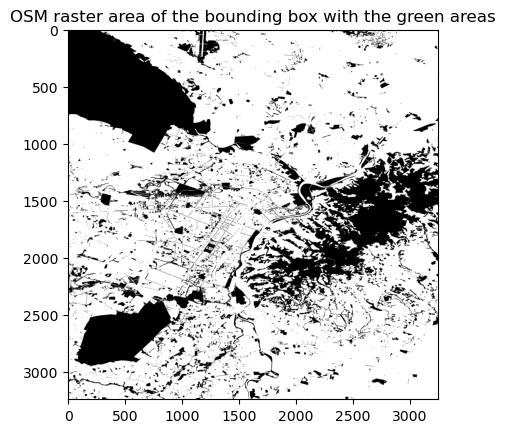

In [2]:
from greento.boundingbox.BoundingBox import BoundingBox
from greento.data.copernicus.CopernicusDownloader import CopernicusDownloader
from greento.data.osm.OSMDownloader import OSMDownloader
from greento.utils.vector.VectorUtils import VectorUtils
from greento.green.GreenOSM import GreenOSM



query = "Piazza Castello, Torino"
shapefile = "../../tiling_schema/WGS84_tile_schema.shp"

copernicus_downloader = CopernicusDownloader(
    client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
    client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
    token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
    use_oidc=False
)
osm_downloader = OSMDownloader()

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=query, method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

# get the raster area of the bounding box
copernicus_area = copernicus_downloader.get_data(bounding_box)

# get the vector area of the bounding box
osm_area = osm_downloader.get_data(bounding_box)


green_osm = GreenOSM(osm_area)

green_osm_area = green_osm.get_green() # get the green areas from the OSM data
utils = VectorUtils(green_osm_area)
green_osm_raster = utils.to_raster(copernicus_area) # convert the green areas to raster, it's passed a raster for the reference of the raster data

raster_osm_data = green_osm_raster["data"]

# Plot the raster data
import matplotlib.pyplot as plt

plt.imshow(raster_osm_data, cmap='gray_r')
plt.title('OSM raster area of the bounding box with the green areas')
plt.show()

#### Download Vector OSM Area giving a bounding box with the network type and convert to raster

BoundingBox(7.550917564864865, 44.935175764864866, 7.821187835135135, 45.20544603513514)


Authenticated using refresh token.


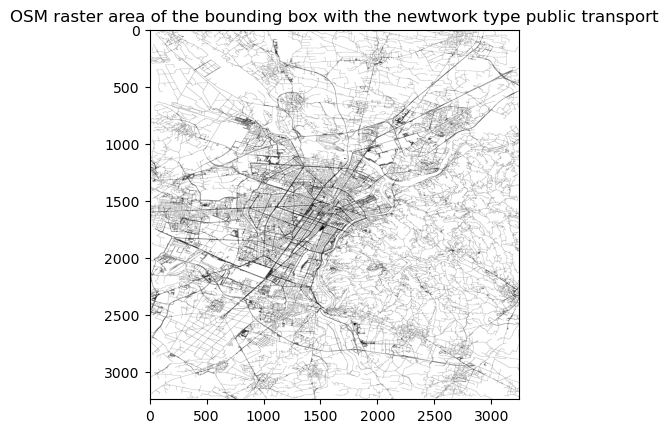

In [5]:
from greento.boundingbox.BoundingBox import BoundingBox
from greento.data.copernicus.CopernicusDownloader import CopernicusDownloader
from greento.data.osm.OSMDownloader import OSMDownloader
from greento.traffic.Traffic import Traffic
from greento.utils.vector.VectorUtils import VectorUtils
from greento.green.GreenOSM import GreenOSM

query = "Piazza Castello, Torino"

copernicus_downloader = CopernicusDownloader(
    client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
    client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
    token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token',
    use_oidc=False
)

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=query, method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

copernicus_area = copernicus_downloader.get_data(bounding_box)
osm_area = OSMDownloader()
osm_area = osm_area.get_data(bounding_box)

# get the vector area of the bounding box with all the network for the public transport
traffic = Traffic(bounding_box)
osm_area_traffic = traffic.get_traffic_area("all_public") # get the traffic areas from the OSM data

utils = VectorUtils(osm_area_traffic)
osm_area_traffic_raster = utils.to_raster(copernicus_area) # convert the vector area to a raster area
osm_area_traffic_data = osm_area_traffic_raster["data"]

# Plot the raster data
import matplotlib.pyplot as plt

plt.imshow(osm_area_traffic_data, cmap='gray_r')
plt.title('OSM raster area of the bounding box with the newtwork type public transport')
plt.show()